In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
df = pd.read_excel('/content/Walmart_global_Superstore.xlsx')
print(df)

       Row ID                  Order ID Order Date  Ship Date       Ship Mode  \
0       40098  CA-2014-AB10015140-41954 2014-11-11 2014-11-13     First Class   
1       26341    IN-2014-JR162107-41675 2014-02-05 2014-02-07    Second Class   
2       25330    IN-2014-CR127307-41929 2014-10-17 2014-10-18     First Class   
3       13524   ES-2014-KM1637548-41667 2014-01-28 2014-01-30     First Class   
4       47221   SG-2014-RH9495111-41948 2014-11-05 2014-11-06        Same Day   
...       ...                       ...        ...        ...             ...   
51285   29002   IN-2015-KE1642066-42174 2015-06-19 2015-06-19        Same Day   
51286   34337  US-2014-ZD21925140-41765 2014-05-06 2014-05-10  Standard Class   
51287   31315  CA-2012-ZD21925140-41147 2012-08-26 2012-08-31    Second Class   
51288    9596   MX-2013-RB1979518-41322 2013-02-17 2013-02-21  Standard Class   
51289    6147   MX-2013-MC1810093-41416 2013-05-22 2013-05-26    Second Class   

        Customer ID       C

**1.Adding a new column Quarter in original Walmart dataset**

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Quarter'] = df['Order Date'].dt.quarter
df.head()

TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead

In [ ]:
# Get the index of the row with maximum sales
max_index = df['Quantity']

# Direct access without .loc
max_sales_date = df['Ship Date'][max_index]
print(max_sales_date)


2015-09-14 00:00:00


In [ ]:
high_sales_customers = df[df['Sales'] > 4000]
print(high_sales_customers)



       Row ID                  Order ID Order Date  Ship Date       Ship Mode  \
2       25330    IN-2014-CR127307-41929 2014-10-17 2014-10-18     First Class   
7       31192   IN-2013-MB1808592-41378 2013-04-14 2013-04-18  Standard Class   
11      28879    ID-2013-AJ107801-41383 2013-04-19 2013-04-22     First Class   
17      12069   ES-2015-PJ1883564-42255 2015-09-08 2015-09-14  Standard Class   
23      13528  ES-2014-LB16795139-41697 2014-02-27 2014-03-01    Second Class   
...       ...                       ...        ...        ...             ...   
49003   38123  CA-2014-TC20980140-41915 2014-10-03 2014-10-10  Standard Class   
49895   37637  CA-2015-TS21370140-42283 2015-10-06 2015-10-10  Standard Class   
49940   33920  CA-2015-TA21385140-42300 2015-10-23 2015-10-25     First Class   
49968   37923  CA-2012-TB21400140-41256 2012-12-13 2012-12-20  Standard Class   
50010   38540  CA-2015-TP21415140-42234 2015-08-18 2015-08-23    Second Class   

        Customer ID     Cus

In [ ]:
top_countries = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(3)
print(top_countries)


Country
United States    2.297201e+06
Australia        9.252359e+05
France           8.589311e+05
Name: Sales, dtype: float64


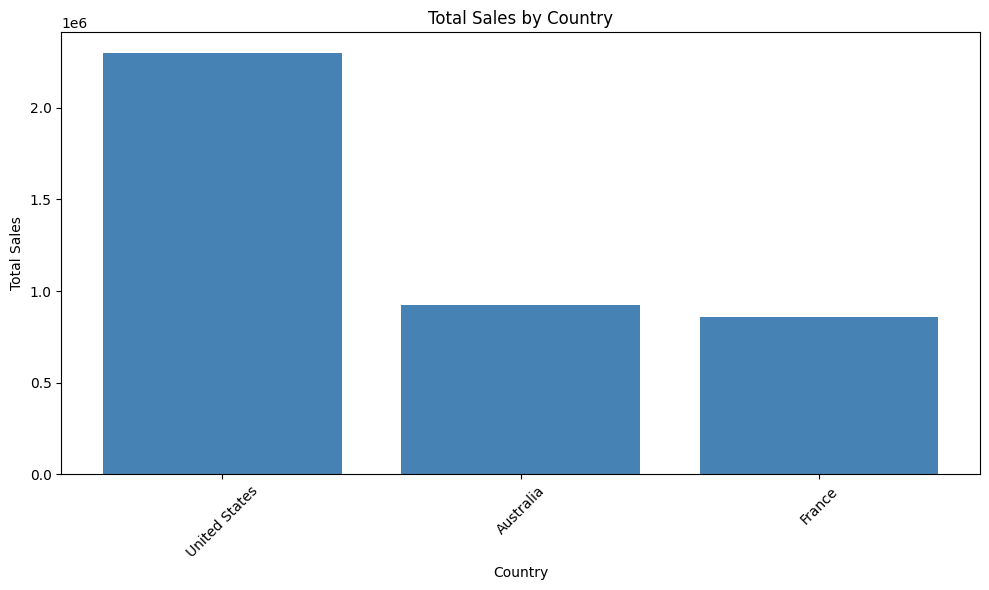

In [ ]:
country_sales = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(3)

# Plot

plt.figure(figsize=(10, 6))
plt.bar(x=country_sales.index, height=country_sales.values, color='steelblue')

plt.title('Total Sales by Country')
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

           Category Sub-Category   Sales
0         Furniture    Bookcases  35.490
1         Furniture       Chairs  13.545
2         Furniture  Furnishings   1.892
3         Furniture       Tables  24.368
4   Office Supplies   Appliances   0.444
5   Office Supplies          Art   1.344
6   Office Supplies      Binders   0.556
7   Office Supplies    Envelopes   1.632
8   Office Supplies    Fasteners   1.240
9   Office Supplies       Labels   1.668
10  Office Supplies        Paper   3.380
11  Office Supplies      Storage   2.799
12  Office Supplies     Supplies   2.920
13       Technology  Accessories   0.990
14       Technology      Copiers  35.460
15       Technology     Machines  11.511
16       Technology       Phones   2.970
Category
Furniture           9860
Office Supplies    31289
Technology         10141
Name: Sub-Category, dtype: int64


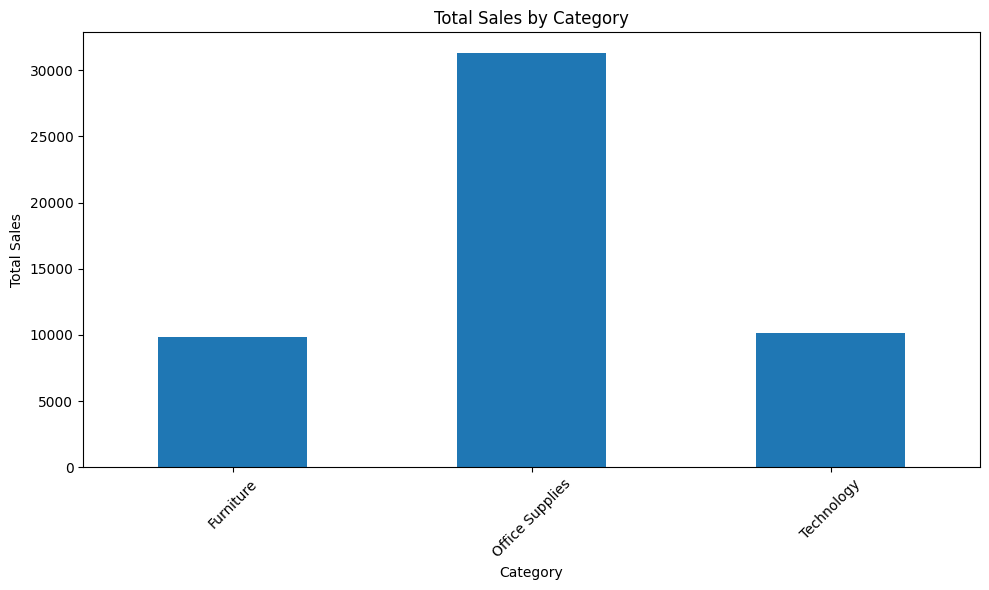

In [ ]:
grouped = df.groupby(['Category', 'Sub-Category'])['Sales'].min().reset_index()
print(grouped)
# Plot
grouped1=df.groupby('Category')['Sub-Category'].count()
print(grouped1)
plt.figure(figsize=(10, 6))
grouped1.plot(kind='bar',x='Category',y='Sales')

plt.title('Total Sales by Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
grouped = df.groupby('Region')['Sales'].min()
print(grouped)

Region
Canada               3.9900
Caribbean            3.1800
Central Africa       3.9900
Central America      2.3640
Central Asia         1.4400
Central US           0.4440
Eastern Africa       1.1610
Eastern Asia         2.9550
Eastern Europe       3.9900
Eastern US           0.8520
North Africa         3.9900
Northern Europe      1.9350
Oceania              2.8800
South America        1.5660
Southeastern Asia    3.3231
Southern Africa      3.9900
Southern Asia        3.4950
Southern Europe      6.0000
Southern US          1.1670
Western Africa       1.1610
Western Asia         1.5480
Western Europe       3.9900
Western US           0.9900
Name: Sales, dtype: float64


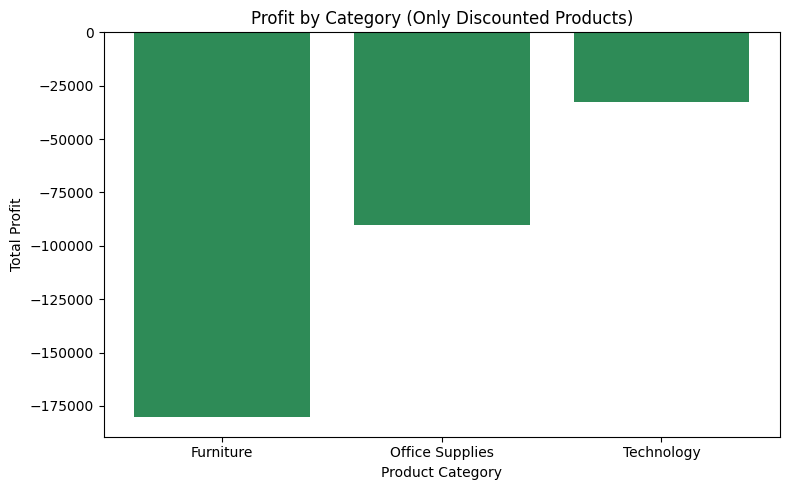

In [ ]:
discounted_df = df[df['Discount'] > 0]
profit_by_category = discounted_df.groupby('Category')['Profit'].sum().reset_index()
plt.figure(figsize=(8, 5))
plt.bar(profit_by_category['Category'], profit_by_category['Profit'], color='seagreen')

plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.title('Profit by Category (Only Discounted Products)')
  # Helps separate profit/loss
plt.tight_layout()
plt.show()


In [ ]:
loss_on_discount = df[(df['Discount'] > 0) & (df['Profit'] < 0)]
result = loss_on_discount[['Category', 'Sub-Category']].drop_duplicates()
print(result)


              Category Sub-Category
1            Furniture       Chairs
3           Technology       Phones
16     Office Supplies      Storage
65          Technology     Machines
73           Furniture       Tables
83     Office Supplies      Binders
85     Office Supplies   Appliances
123         Technology      Copiers
148          Furniture    Bookcases
209         Technology  Accessories
231    Office Supplies     Supplies
518          Furniture  Furnishings
2142   Office Supplies          Art
2833   Office Supplies    Envelopes
3984   Office Supplies    Fasteners
9042   Office Supplies        Paper
12237  Office Supplies       Labels
